In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df=pd.read_csv("C:/Users/ELCOT/Desktop/abc/salestimeseries.csv")

In [5]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
df.columns=["ds","y"]

In [7]:
df.dropna(inplace=True)                             ###droping missing values

In [8]:
df.dtypes

ds     object
y     float64
dtype: object

In [9]:
df.dtypes

ds     object
y     float64
dtype: object

In [10]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [11]:
model=Prophet()

In [12]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [14]:
future_dates=model.make_future_dataframe( periods=365, freq = "D", include_history = True)


In [15]:
predictions=model.predict(future_dates)

In [16]:
predictions.head()                  #### prediction range

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3495.535131,1493.085320,3325.879701,3495.535131,3495.535131,-1119.594997,-1119.594997,-1119.594997,-1119.594997,-1119.594997,-1119.594997,0.0,0.0,0.0,2375.940135
1,1964-02-01,3526.499569,942.965564,2890.950381,3526.499569,3526.499569,-1599.245377,-1599.245377,-1599.245377,-1599.245377,-1599.245377,-1599.245377,0.0,0.0,0.0,1927.254192
2,1964-03-01,3555.466301,1735.676385,3686.468119,3555.466301,3555.466301,-797.696928,-797.696928,-797.696928,-797.696928,-797.696928,-797.696928,0.0,0.0,0.0,2757.769373
3,1964-04-01,3586.430738,1701.125981,3657.372814,3586.430738,3586.430738,-947.544797,-947.544797,-947.544797,-947.544797,-947.544797,-947.544797,0.0,0.0,0.0,2638.885941
4,1964-05-01,3616.396324,1918.886263,3754.703060,3616.396324,3616.396324,-745.470843,-745.470843,-745.470843,-745.470843,-745.470843,-745.470843,0.0,0.0,0.0,2870.925481


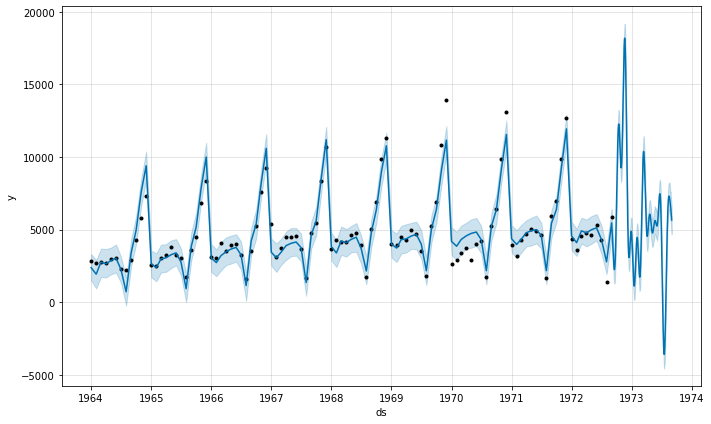

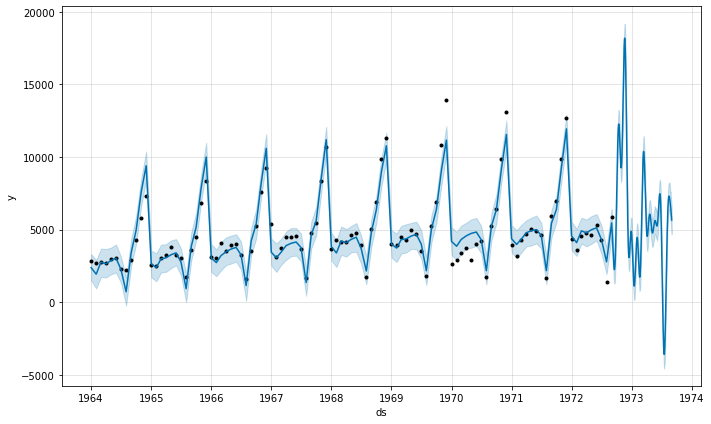

In [17]:
model.plot(predictions)              ###plotting the predictios

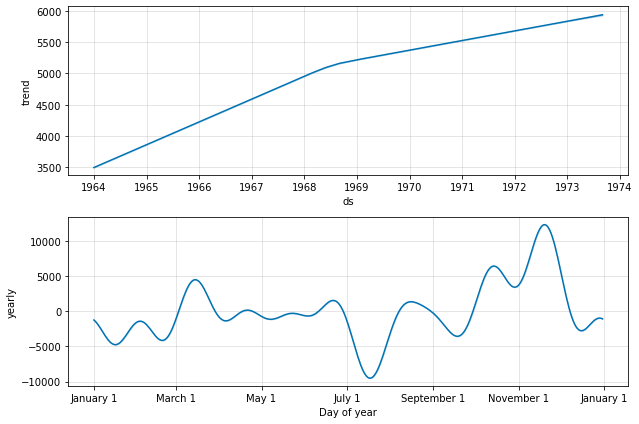

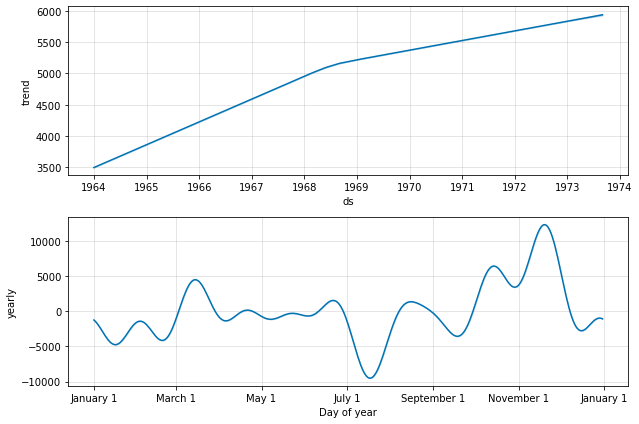

In [18]:
model.plot_components(predictions)